In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/content/drive/MyDrive/OHCA.csv')#retrieve dataset from the google drive

In [ ]:
df['output'] = df['output'].replace([1, 2, 3, 4], 1)

df = df.drop(columns=['thal', 'ca'])
print(df.columns.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'output']


In [ ]:
df.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,output
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,52.0,1.0,4.0,128.0,255.0,0.0,0.0,161.0,1.0,0.0,1.0,1
96,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1
97,60.0,0.0,4.0,150.0,258.0,0.0,2.0,157.0,0.0,2.6,2.0,1
98,52.0,1.0,2.0,134.0,201.0,0.0,0.0,158.0,0.0,0.8,1.0,0


In [ ]:
df.tail(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,output
820,68.0,1.0,3.0,150,195,1,0,132,0,0,?,1
821,65.0,1.0,4.0,150,235,0,0,120,1,1.5,2,1
822,48.0,1.0,3.0,102,0,?,1,110,1,1,3,1
823,63.0,1.0,4.0,96,305,0,1,121,1,1,1,1
824,64.0,1.0,4.0,130,223,0,1,128,0,0.5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127,333,1,1,154,0,0,?,1
916,62.0,1.0,1.0,?,139,0,1,?,?,?,?,0
917,55.0,1.0,4.0,122,223,1,1,100,0,0,?,1
918,58.0,1.0,4.0,?,385,1,2,?,?,?,?,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  output    920 non-null    int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 86.4+ KB


In [ ]:
# Identify rows containing "?"
rows_with_question_mark = df[df.apply(lambda row: any('?' in str(value) for value in row), axis=1)]

# Display the count and the rows containing "?"
print("Number of rows containing '?':", len(rows_with_question_mark))
print("Rows containing '?' details:\n", rows_with_question_mark)

# Remove rows containing "?"
df_cleaned = df[~df.apply(lambda row: any('?' in str(value) for value in row), axis=1)]

# Display the shape of the cleaned DataFrame
print("Shape of the cleaned DataFrame:", df_cleaned.shape)

Number of rows containing '?': 389
Rows containing '?' details:
       age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope  \
303  28.0  1.0  2.0      130  132   0       2     185     0     0.0     ?   
304  29.0  1.0  2.0      120  243   0       0     160     0     0.0     ?   
305  29.0  1.0  2.0      140    ?   0       0     170     0     0.0     ?   
306  30.0  0.0  1.0      170  237   0       1     170     0     0.0     ?   
307  31.0  0.0  2.0      100  219   0       1     150     0     0.0     ?   
..    ...  ...  ...      ...  ...  ..     ...     ...   ...     ...   ...   
915  54.0  0.0  4.0      127  333   1       1     154     0       0     ?   
916  62.0  1.0  1.0        ?  139   0       1       ?     ?       ?     ?   
917  55.0  1.0  4.0      122  223   1       1     100     0       0     ?   
918  58.0  1.0  4.0        ?  385   1       2       ?     ?       ?     ?   
919  62.0  1.0  2.0      120  254   0       2      93     1       0     ?   

     outpu

In [ ]:

# Replace '?' with NaN
df.replace(['?'], np.nan, inplace=True)

# List of categorical columns
categorical_columns = ['fbs', 'restecg', 'exang', 'slope']

# List of numeric columns
numeric_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Replace missing values in categorical columns with mode
for column in categorical_columns:
    mode_value = df[column].mode().iloc[0]
    df[column].fillna(mode_value, inplace=True)

# Replace missing values in numeric columns with mean
for column in numeric_columns:
    mean_value = df[column].astype(float).mean()  # Convert to float before calculating mean
    df[column].fillna(mean_value, inplace=True)

# Display the cleaned DataFrame
print("Cleaned DataFrame:\n", df)

'''
import numpy as np
import pandas as pd

# Replace '?' with NaN
df.replace(['?'], np.nan, inplace=True)

# Drop rows with missing values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print("Cleaned DataFrame:\n", df_cleaned)
'''


Cleaned DataFrame:
       age  sex   cp    trestbps   chol  fbs restecg     thalach exang  \
0    63.0  1.0  1.0       145.0  233.0  1.0     2.0       150.0   0.0   
1    67.0  1.0  4.0       160.0  286.0  0.0     2.0       108.0   1.0   
2    67.0  1.0  4.0       120.0  229.0  0.0     2.0       129.0   1.0   
3    37.0  1.0  3.0       130.0  250.0  0.0     0.0       187.0   0.0   
4    41.0  0.0  2.0       130.0  204.0  0.0     2.0       172.0   0.0   
..    ...  ...  ...         ...    ...  ...     ...         ...   ...   
915  54.0  0.0  4.0         127    333    1       1         154     0   
916  62.0  1.0  1.0  132.132404    139    0       1  137.545665     0   
917  55.0  1.0  4.0         122    223    1       1         100     0   
918  58.0  1.0  4.0  132.132404    385    1       2  137.545665     0   
919  62.0  1.0  2.0         120    254    0       2          93     1   

      oldpeak slope  output  
0         2.3   3.0       0  
1         1.5   2.0       1  
2         2.6

'\nimport numpy as np\nimport pandas as pd\n\n# Replace \'?\' with NaN\ndf.replace([\'?\'], np.nan, inplace=True)\n\n# Drop rows with missing values\ndf_cleaned = df.dropna()\n\n# Display the cleaned DataFrame\nprint("Cleaned DataFrame:\n", df_cleaned)\n'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  output    920 non-null    int64  
dtypes: float64(3), int64(1), object(8)
memory usage: 86.4+ KB


In [ ]:
# List of columns with mixed data types
columns_to_convert = ['age', 'sex', 'chol', 'thalach', 'trestbps', 'cp', 'fbs', 'restecg', 'exang', 'slope']

# Convert columns with mixed data types to integers
for column in columns_to_convert:
    df[column] = df[column].apply(lambda x: int(float(x)) if isinstance(x, str) else int(x))

# List of columns to convert to float
columns_to_convert_float = ['oldpeak']

# Convert 'oldpeak' column to float
for column in columns_to_convert_float:
    df[column] = df[column].astype(float)

df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,output
0,63,1,1,145,233,1,2,150,0,2.3,3,0
1,67,1,4,160,286,0,2,108,1,1.5,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0
6,62,0,4,140,268,0,2,160,0,3.6,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1
9,53,1,4,140,203,1,2,155,1,3.1,3,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    int64  
 4   chol      920 non-null    int64  
 5   fbs       920 non-null    int64  
 6   restecg   920 non-null    int64  
 7   thalach   920 non-null    int64  
 8   exang     920 non-null    int64  
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    int64  
 11  output    920 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.4 KB


In [ ]:
# Identify duplicate rows
duplicate_mask = df.duplicated()
duplicate_rows = df[duplicate_mask]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
405   49    0   2       110   199    0        0      160      0      0.0   
907   58    1   3       150   219    0        1      118      1      0.0   

     slope  output  
405      2       0  
907      2       1  


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check the shape of the DataFrame after removing duplicates
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (918, 12)


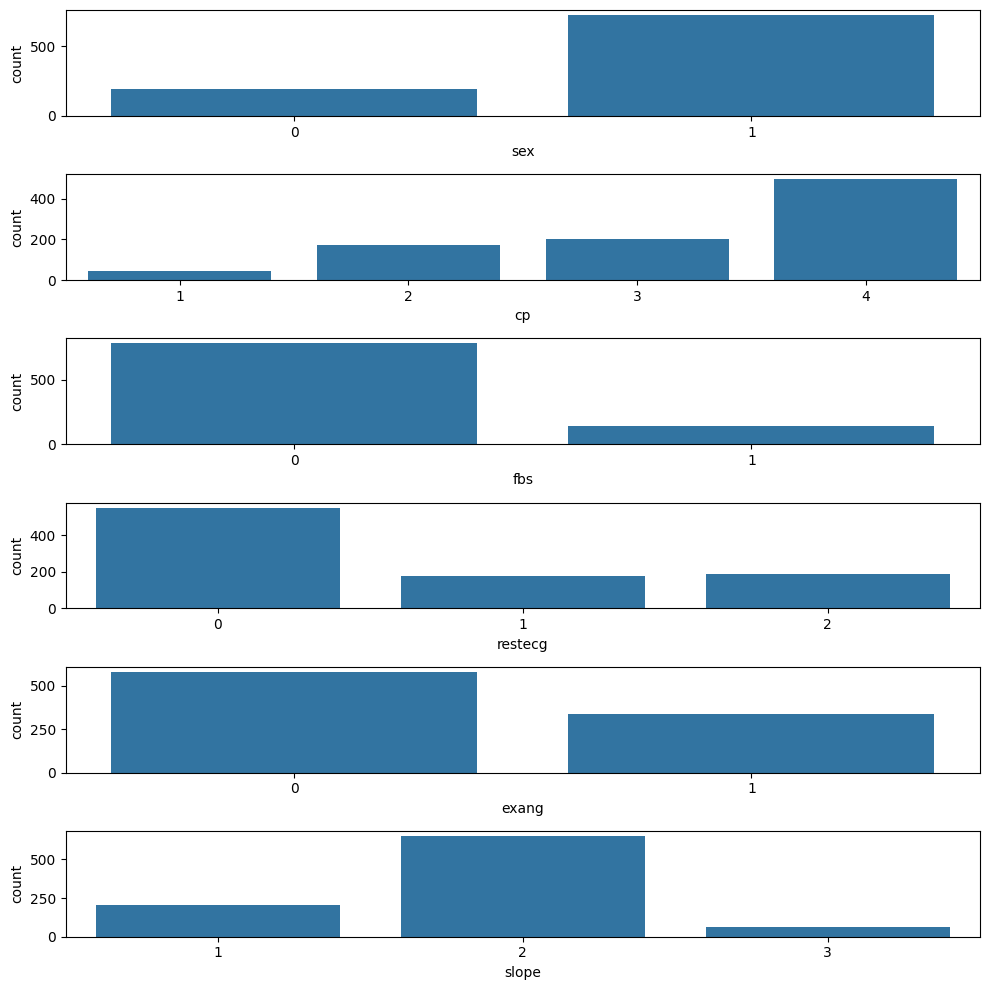

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#dataset has two type of attribute: numerical category data, numerical contunious value

# Plot count plots for categorical attributes/1,0
categorical_attributes = [ 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(10, 10))

for ax, attribute in zip(axes, categorical_attributes):
    sns.countplot(data=df, x=attribute, ax=ax)

plt.tight_layout()
plt.show()

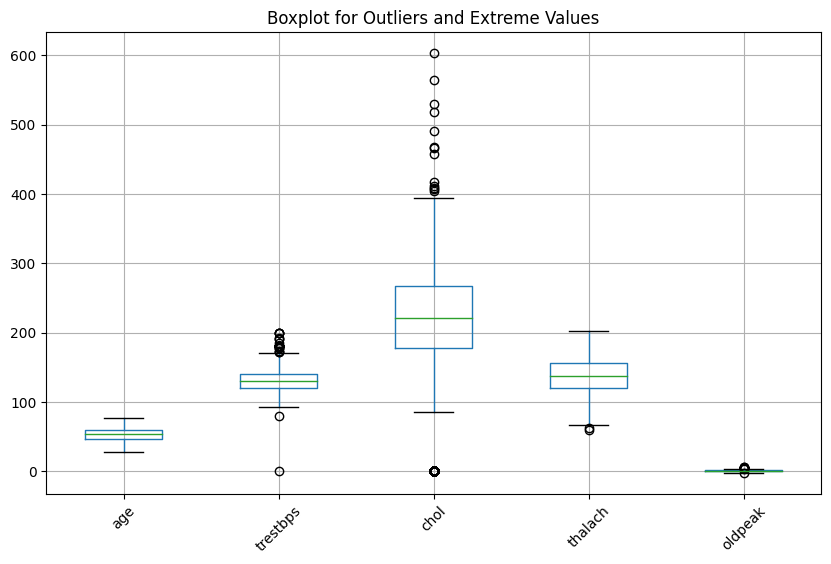

In [ ]:
import matplotlib.pyplot as plt

# Select the columns containing numericcontunious value
numeric_features = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

# Create a boxplot for the selected columns/numerical
plt.figure(figsize=(10, 6))
numeric_features.boxplot()
plt.title("Boxplot for Outliers and Extreme Values")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    int64  
 2   cp        918 non-null    int64  
 3   trestbps  918 non-null    int64  
 4   chol      918 non-null    int64  
 5   fbs       918 non-null    int64  
 6   restecg   918 non-null    int64  
 7   thalach   918 non-null    int64  
 8   exang     918 non-null    int64  
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    int64  
 11  output    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


In [ ]:
# Assuming df is your DataFrame containing the dataset
label_counts = df['output'].value_counts()

# Print the count of each label
print("Label Counts:")
print(label_counts)


Label Counts:
output
1    508
0    410
Name: count, dtype: int64


DT MODEL


Training Features Shape: (642, 11)
Testing Features Shape: (276, 11)
Training Labels Shape: (642,)
Testing Labels Shape: (276,)
------------------------------------------------
Decision Tree Model Metrics:

Training Accuracy: 85.05%
Training Error: 14.95%
Test Accuracy: 80.80%
Testing Error: 19.20%

True Positives (TP): 115
True Negatives (TN): 108
False Positives (FP): 21
False Negatives (FN): 32

Precision: 0.8455882352941176
Recall: 0.782312925170068
F1-Score: 0.8127208480565371

Confusion Matrix:

            cardiac  no cardiac
cardiac         115          32
no cardiac       21         108



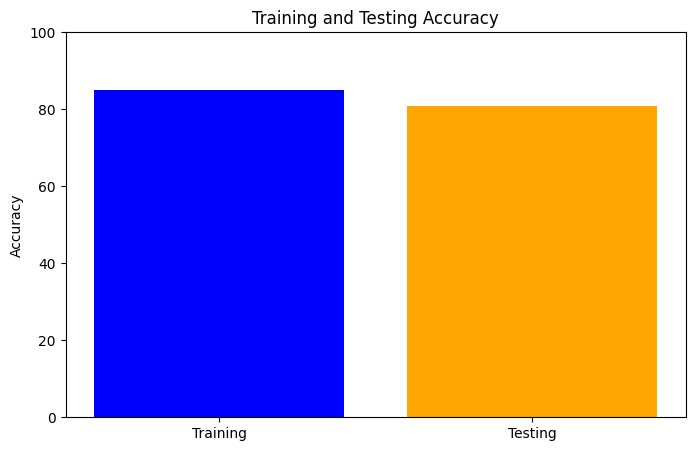


Sample 1: Probabilities - Class 0: 0.6667, Class 1: 0.3333, Prediction: 0
Sample 2: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 3: Probabilities - Class 0: 0.1250, Class 1: 0.8750, Prediction: 1
Sample 4: Probabilities - Class 0: 0.8000, Class 1: 0.2000, Prediction: 0
Sample 5: Probabilities - Class 0: 0.8750, Class 1: 0.1250, Prediction: 0
Sample 6: Probabilities - Class 0: 0.8750, Class 1: 0.1250, Prediction: 0
Sample 7: Probabilities - Class 0: 0.0000, Class 1: 1.0000, Prediction: 1
Sample 8: Probabilities - Class 0: 1.0000, Class 1: 0.0000, Prediction: 0
Sample 9: Probabilities - Class 0: 0.7778, Class 1: 0.2222, Prediction: 0
Sample 10: Probabilities - Class 0: 0.3636, Class 1: 0.6364, Prediction: 1
Sample 11: Probabilities - Class 0: 0.5000, Class 1: 0.5000, Prediction: 0
Sample 12: Probabilities - Class 0: 1.0000, Class 1: 0.0000, Prediction: 0
Sample 13: Probabilities - Class 0: 0.8750, Class 1: 0.1250, Prediction: 0
Sample 14: Probabilities - Class 

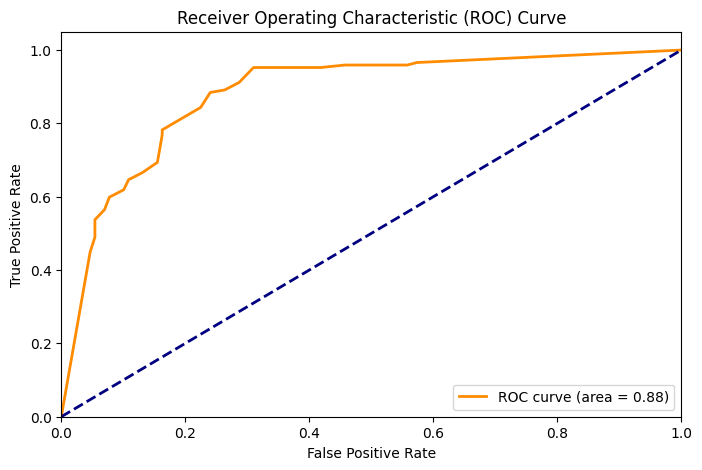

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Split the dataset into training and testing sets
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("")
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the DT model
dt_model = DecisionTreeClassifier(random_state=0)

# Step 4-8: Hyperparameter tuning
dt_model.set_params(max_depth=10, min_samples_split=2,
                    min_samples_leaf=8, max_features=None,
                    min_impurity_decrease=0.0)

# Step 9: Train and test the DT model
dt_model.fit(X_train_scaled, y_train)
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)*100
accuracy_test = accuracy_score(y_test, y_test_pred)*100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)


# Print evaluation metrics
print("------------------------------------------------")
print("Decision Tree Model Metrics:\n")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm= confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN= cm[1, 0]
TP = cm[1, 1]

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

print("")
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("Confusion Matrix:\n")
print(cm_df)
print()

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = dt_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.55
# <0.5>
# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Training Features Shape: (642, 11)
Testing Features Shape: (276, 11)
Training Labels Shape: (642,)
Testing Labels Shape: (276,)
------------------------------------------------
Decision Tree Model Metrics:

Training Accuracy: 82.24%
Training Error: 17.76%
Test Accuracy: 80.43%
Testing Error: 19.57%

True Positives (TP): 114
True Negatives (TN): 108
False Positives (FP): 21
False Negatives (FN): 33

Precision: 0.8444444444444444
Recall: 0.7755102040816326
F1-Score: 0.8085106382978723

Confusion Matrix:

            cardiac  no cardiac
cardiac         114          33
no cardiac       21         108



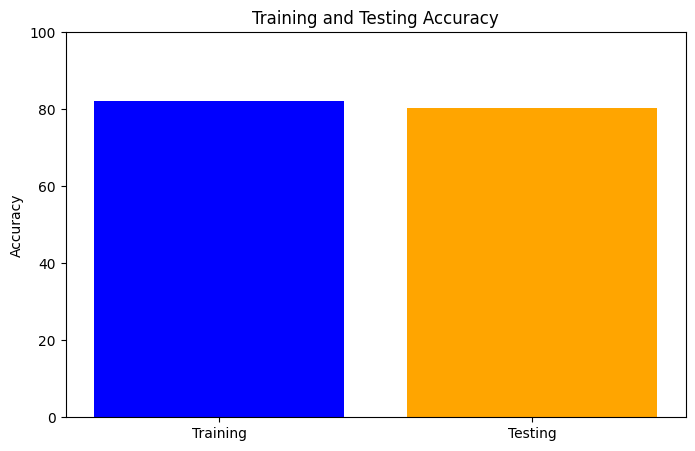


Sample 1: Probabilities - Class 0: 0.8500, Class 1: 0.1500, Prediction: 0
Sample 2: Probabilities - Class 0: 0.1209, Class 1: 0.8791, Prediction: 1
Sample 3: Probabilities - Class 0: 0.5789, Class 1: 0.4211, Prediction: 0
Sample 4: Probabilities - Class 0: 0.5200, Class 1: 0.4800, Prediction: 0
Sample 5: Probabilities - Class 0: 0.9474, Class 1: 0.0526, Prediction: 0
Sample 6: Probabilities - Class 0: 0.8500, Class 1: 0.1500, Prediction: 0
Sample 7: Probabilities - Class 0: 0.0330, Class 1: 0.9670, Prediction: 1
Sample 8: Probabilities - Class 0: 0.8500, Class 1: 0.1500, Prediction: 0
Sample 9: Probabilities - Class 0: 0.5000, Class 1: 0.5000, Prediction: 0
Sample 10: Probabilities - Class 0: 0.3636, Class 1: 0.6364, Prediction: 1
Sample 11: Probabilities - Class 0: 0.1209, Class 1: 0.8791, Prediction: 1
Sample 12: Probabilities - Class 0: 0.9474, Class 1: 0.0526, Prediction: 0
Sample 13: Probabilities - Class 0: 0.8500, Class 1: 0.1500, Prediction: 0
Sample 14: Probabilities - Class 

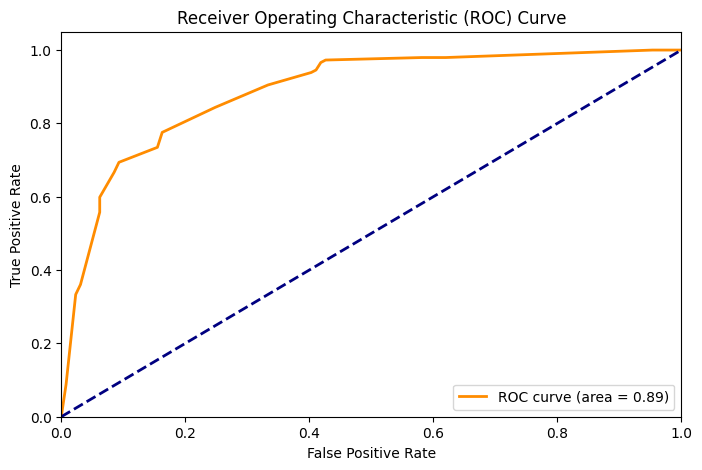

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Split the dataset into training and testing sets
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("")
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the DT model
dt_model = DecisionTreeClassifier(random_state=0)

# Step 4-8: Hyperparameter tuning
dt_model.set_params(max_depth=5, min_samples_split=2,
                    min_samples_leaf=9, max_features=None,
                    min_impurity_decrease=0.0)

# Step 9: Train and test the DT model
dt_model.fit(X_train_scaled, y_train)
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)*100
accuracy_test = accuracy_score(y_test, y_test_pred)*100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)


# Print evaluation metrics
print("------------------------------------------------")
print("Decision Tree Model Metrics:\n")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm= confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN= cm[1, 0]
TP = cm[1, 1]

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

print("")
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("Confusion Matrix:\n")
print(cm_df)
print()

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = dt_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.57

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Training Features Shape: (642, 11)
Testing Features Shape: (276, 11)
Training Labels Shape: (642,)
Testing Labels Shape: (276,)
------------------------------------------------
Decision Tree Model Metrics:

Training Accuracy: 84.58%
Training Error: 15.42%
Test Accuracy: 80.07%
Testing Error: 19.93%

True Positives (TP): 121
True Negatives (TN): 100
False Positives (FP): 29
False Negatives (FN): 26

Precision: 0.8066666666666666
Recall: 0.8231292517006803
F1-Score: 0.8148148148148149

Confusion Matrix:

            cardiac  no cardiac
cardiac         121          26
no cardiac       29         100



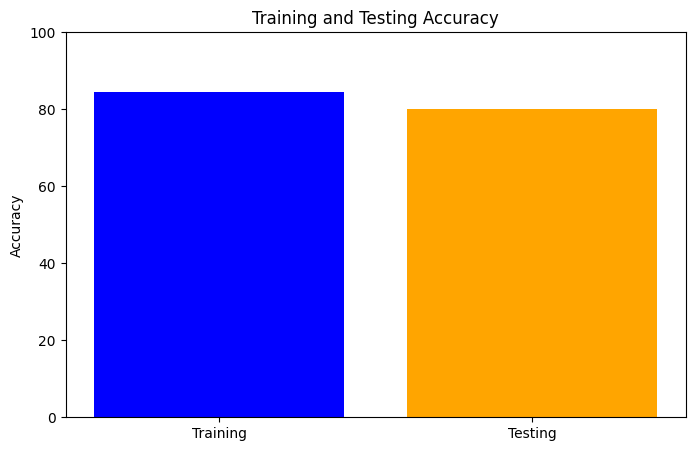


Sample 1: Probabilities - Class 0: 0.9565, Class 1: 0.0435, Prediction: 0
Sample 2: Probabilities - Class 0: 0.3333, Class 1: 0.6667, Prediction: 1
Sample 3: Probabilities - Class 0: 0.1765, Class 1: 0.8235, Prediction: 1
Sample 4: Probabilities - Class 0: 0.6923, Class 1: 0.3077, Prediction: 0
Sample 5: Probabilities - Class 0: 0.9565, Class 1: 0.0435, Prediction: 0
Sample 6: Probabilities - Class 0: 0.9565, Class 1: 0.0435, Prediction: 0
Sample 7: Probabilities - Class 0: 0.0130, Class 1: 0.9870, Prediction: 1
Sample 8: Probabilities - Class 0: 0.8750, Class 1: 0.1250, Prediction: 0
Sample 9: Probabilities - Class 0: 1.0000, Class 1: 0.0000, Prediction: 0
Sample 10: Probabilities - Class 0: 0.4286, Class 1: 0.5714, Prediction: 1
Sample 11: Probabilities - Class 0: 0.0130, Class 1: 0.9870, Prediction: 1
Sample 12: Probabilities - Class 0: 0.4286, Class 1: 0.5714, Prediction: 1
Sample 13: Probabilities - Class 0: 0.9565, Class 1: 0.0435, Prediction: 0
Sample 14: Probabilities - Class 

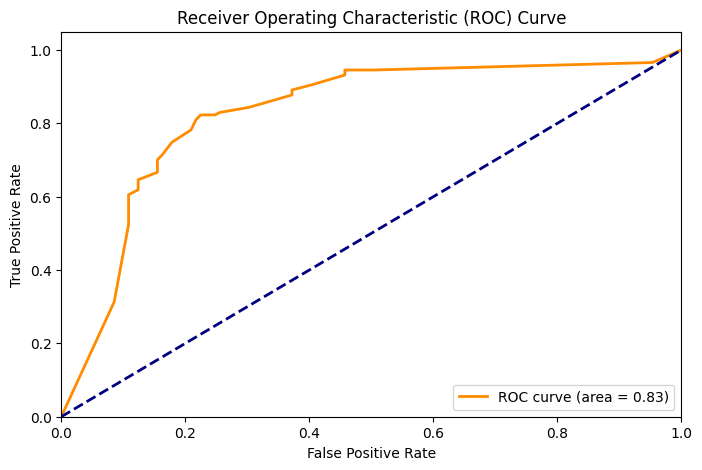

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Split the dataset into training and testing sets
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("")
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the DT model
dt_model = DecisionTreeClassifier(random_state=0)

# Step 4-8: Hyperparameter tuning
dt_model.set_params(max_depth=7, min_samples_split=8,
                    min_samples_leaf=2, max_features='sqrt',
                    min_impurity_decrease=0.0)

# Step 9: Train and test the DT model
dt_model.fit(X_train_scaled, y_train)
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred)*100
accuracy_test = accuracy_score(y_test, y_test_pred)*100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)


# Print evaluation metrics
print("------------------------------------------------")
print("Decision Tree Model Metrics:\n")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm= confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN= cm[1, 0]
TP = cm[1, 1]

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

print("")
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("Confusion Matrix:\n")
print(cm_df)
print()

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = dt_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.52

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4],

}


# Create the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=0)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

'''
'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10, 12, 15, 20],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7, 0.8, 0.9],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0]
'''

'''
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3]'''
'''
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10, 12, 15, 20],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7, 0.8, 0.9],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0]
'''


Best Hyperparameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2}


"\nparam_grid = {\n    'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],\n    'min_samples_split': [2, 4, 6, 8, 10, 12, 15, 20],\n    'min_samples_leaf': [1, 2, 4, 8, 10, 12, 15, 20],\n    'max_features': [None, 'sqrt', 'log2', 0.5, 0.7, 0.8, 0.9],\n    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0]\n"

**NB MODEL**

Training Features Shape: (642, 11)
Testing Features Shape: (276, 11)
Training Labels Shape: (642,)
Testing Labels Shape: (276,)
------------------------------------------------
Gaussian Naive Bayes Model Metrics:

Training Accuracy: 81.78%
Training Error: 18.22%
Test Accuracy: 79.35%
Testing Error: 20.65%

True Positives (TP): 129
True Negatives (TN): 90
False Positives (FP): 39
False Negatives (FN): 18

Precision: 0.7678571428571429
Recall: 0.8775510204081632
F1-Score: 0.819047619047619

Confusion Matrix:

            cardiac  no cardiac
cardiac         129          18
no cardiac       39          90


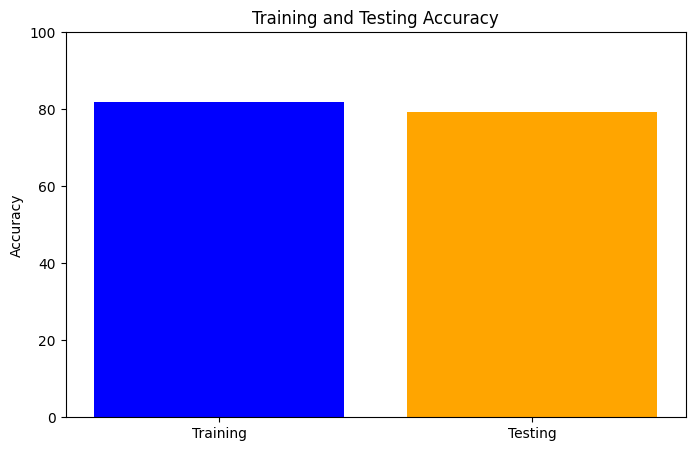


Sample 1: Probabilities - Class 0: 1.0000, Class 1: 0.0000, Prediction: 0
Sample 2: Probabilities - Class 0: 0.0026, Class 1: 0.9974, Prediction: 1
Sample 3: Probabilities - Class 0: 0.9825, Class 1: 0.0175, Prediction: 0
Sample 4: Probabilities - Class 0: 0.4215, Class 1: 0.5785, Prediction: 1
Sample 5: Probabilities - Class 0: 0.9982, Class 1: 0.0018, Prediction: 0
Sample 6: Probabilities - Class 0: 0.9965, Class 1: 0.0035, Prediction: 0
Sample 7: Probabilities - Class 0: 0.0002, Class 1: 0.9998, Prediction: 1
Sample 8: Probabilities - Class 0: 0.1381, Class 1: 0.8619, Prediction: 1
Sample 9: Probabilities - Class 0: 0.2210, Class 1: 0.7790, Prediction: 1
Sample 10: Probabilities - Class 0: 0.0019, Class 1: 0.9981, Prediction: 1
Sample 11: Probabilities - Class 0: 0.0117, Class 1: 0.9883, Prediction: 1
Sample 12: Probabilities - Class 0: 0.7041, Class 1: 0.2959, Prediction: 0
Sample 13: Probabilities - Class 0: 0.8547, Class 1: 0.1453, Prediction: 0
Sample 14: Probabilities - Class 

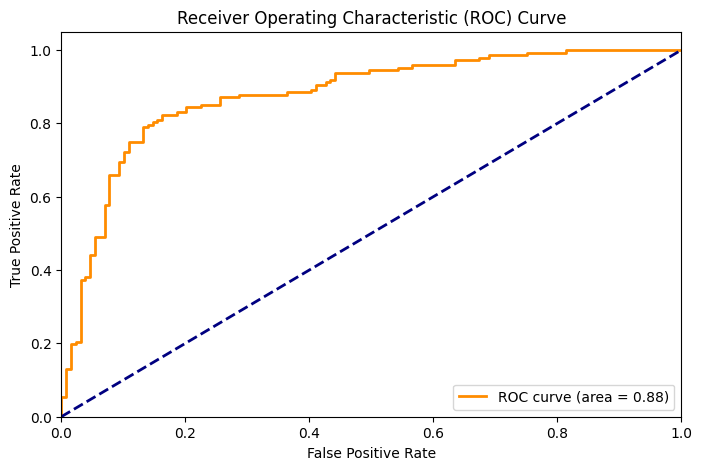

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Step 4-5: Hyperparameter tuning
nb_model.set_params(var_smoothing=1e-9, priors=[0.2, 0.8])

# Step 6: Train and test the Gaussian Naive Bayes model
nb_model.fit(X_train_scaled, y_train)
y_train_pred = nb_model.predict(X_train_scaled)
y_test_pred = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("Gaussian Naive Bayes Model Metrics:\n")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:\n")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = nb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Training Features Shape: (642, 11)
Testing Features Shape: (276, 11)
Training Labels Shape: (642,)
Testing Labels Shape: (276,)
------------------------------------------------

Gaussian Naive Bayes Model Metrics:
Training Accuracy: 81.46%
Training Error: 18.54%
Test Accuracy: 80.80%
Testing Error: 19.20%

True Positives (TP): 128
True Negatives (TN): 95
False Positives (FP): 34
False Negatives (FN): 19

Precision: 0.7901234567901234
Recall: 0.8707482993197279
F1-Score: 0.8284789644012944

Confusion Matrix:

            cardiac  no cardiac
cardiac         128          19
no cardiac       34          95


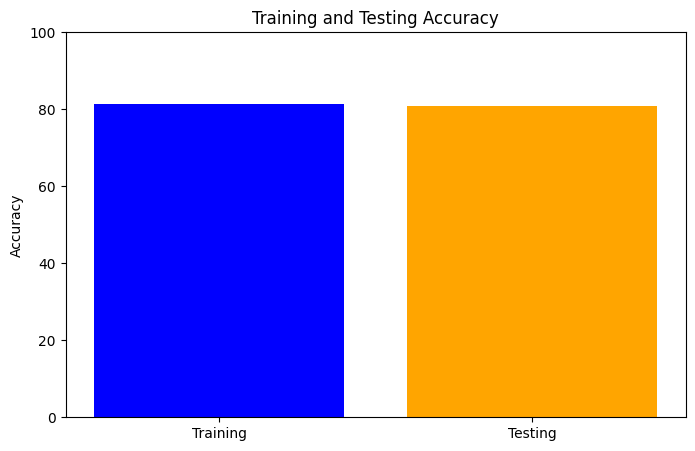


Sample 1: Probabilities - Class 0: 1.0000, Class 1: 0.0000, Prediction: 0
Sample 2: Probabilities - Class 0: 0.0035, Class 1: 0.9965, Prediction: 1
Sample 3: Probabilities - Class 0: 0.9867, Class 1: 0.0133, Prediction: 0
Sample 4: Probabilities - Class 0: 0.4925, Class 1: 0.5075, Prediction: 1
Sample 5: Probabilities - Class 0: 0.9986, Class 1: 0.0014, Prediction: 0
Sample 6: Probabilities - Class 0: 0.9973, Class 1: 0.0027, Prediction: 0
Sample 7: Probabilities - Class 0: 0.0002, Class 1: 0.9998, Prediction: 1
Sample 8: Probabilities - Class 0: 0.1765, Class 1: 0.8235, Prediction: 1
Sample 9: Probabilities - Class 0: 0.2750, Class 1: 0.7250, Prediction: 1
Sample 10: Probabilities - Class 0: 0.0026, Class 1: 0.9974, Prediction: 1
Sample 11: Probabilities - Class 0: 0.0157, Class 1: 0.9843, Prediction: 1
Sample 12: Probabilities - Class 0: 0.7600, Class 1: 0.2400, Prediction: 0
Sample 13: Probabilities - Class 0: 0.8866, Class 1: 0.1134, Prediction: 0
Sample 14: Probabilities - Class 

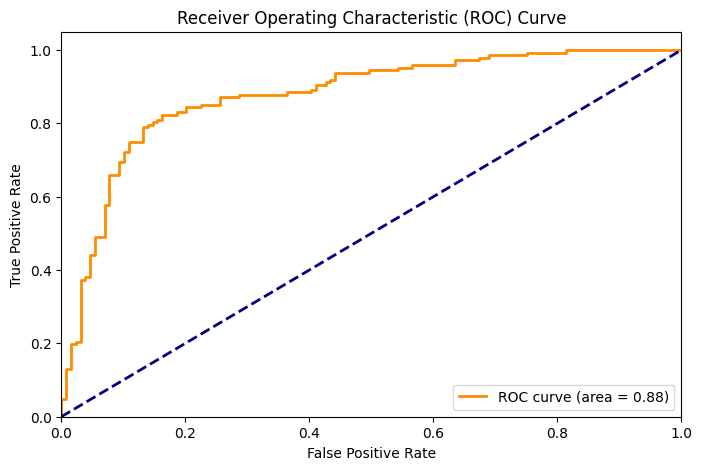

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 3: Create the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

#Step 4-5: Hyperparameter Tuning
nb_model.set_params(var_smoothing=1e-03, priors=[0.25, 0.75])


# Step 4-5: Train and test the Gaussian Naive Bayes model
nb_model.fit(X_train_scaled, y_train)
y_train_pred = nb_model.predict(X_train_scaled)
y_test_pred = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nGaussian Naive Bayes Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:\n")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = nb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Training Features Shape: (642, 11)
Testing Features Shape: (276, 11)
Training Labels Shape: (642,)
Testing Labels Shape: (276,)
------------------------------------------------

Gaussian Naive Bayes Model Metrics:
Training Accuracy: 81.93%
Training Error: 18.07%
Test Accuracy: 81.52%
Testing Error: 18.48%

True Positives (TP): 126
True Negatives (TN): 99
False Positives (FP): 30
False Negatives (FN): 21

Precision: 0.8076923076923077
Recall: 0.8571428571428571
F1-Score: 0.8316831683168318

Confusion Matrix:

            cardiac  no cardiac
cardiac         126          21
no cardiac       30          99


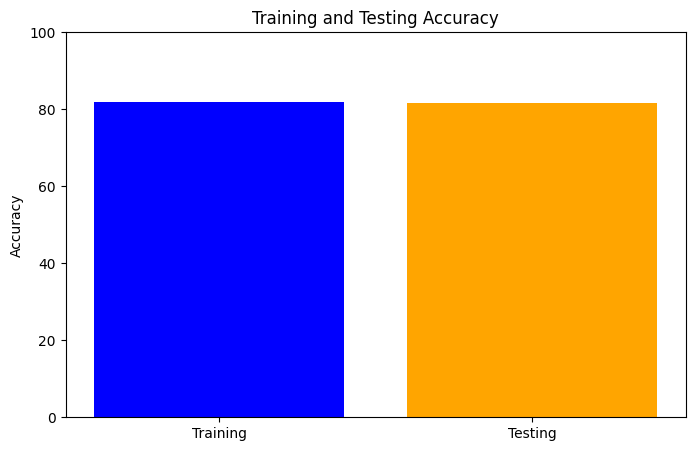


Sample 1: Probabilities - Class 0: 0.9999, Class 1: 0.0001, Prediction: 0
Sample 2: Probabilities - Class 0: 0.0114, Class 1: 0.9886, Prediction: 1
Sample 3: Probabilities - Class 0: 0.9810, Class 1: 0.0190, Prediction: 0
Sample 4: Probabilities - Class 0: 0.5480, Class 1: 0.4520, Prediction: 0
Sample 5: Probabilities - Class 0: 0.9970, Class 1: 0.0030, Prediction: 0
Sample 6: Probabilities - Class 0: 0.9945, Class 1: 0.0055, Prediction: 0
Sample 7: Probabilities - Class 0: 0.0009, Class 1: 0.9991, Prediction: 1
Sample 8: Probabilities - Class 0: 0.2738, Class 1: 0.7262, Prediction: 1
Sample 9: Probabilities - Class 0: 0.3873, Class 1: 0.6127, Prediction: 1
Sample 10: Probabilities - Class 0: 0.0087, Class 1: 0.9913, Prediction: 1
Sample 11: Probabilities - Class 0: 0.0354, Class 1: 0.9646, Prediction: 1
Sample 12: Probabilities - Class 0: 0.7817, Class 1: 0.2183, Prediction: 0
Sample 13: Probabilities - Class 0: 0.8864, Class 1: 0.1136, Prediction: 0
Sample 14: Probabilities - Class 

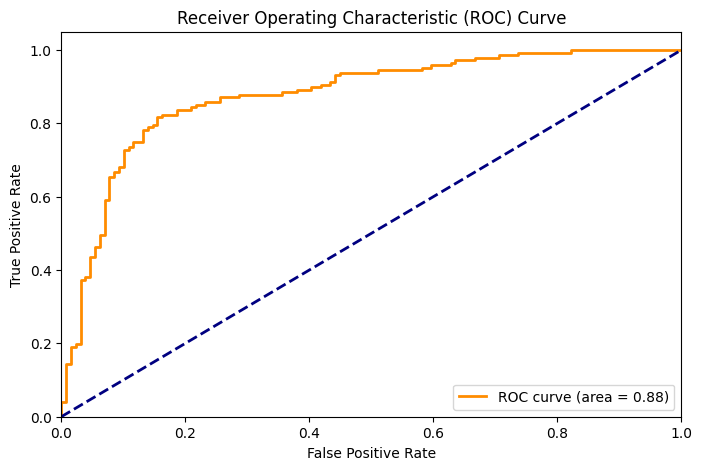

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 3: Create the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

#Step 4-5: Hyperparameter Tuning
nb_model.set_params(var_smoothing=1e-1, priors=[0.31, 0.69])

# Step 4-5: Train and test the Gaussian Naive Bayes model
nb_model.fit(X_train_scaled, y_train)
y_train_pred = nb_model.predict(X_train_scaled)
y_test_pred = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nGaussian Naive Bayes Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:\n")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = nb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Step 3: Create the Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Step 4: Define the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4],
               [0.7, 0.3], [0.8, 0.2], [0.9, 0.1], [0.1, 0.9]],
}

# Step 5: Create GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'priors': [0.3, 0.7], 'var_smoothing': 1e-08}


**XGBOOST MODEL**

Training Features Shape: (642, 11)
Testing Features Shape: (276, 11)
Training Labels Shape: (642,)
Testing Labels Shape: (276,)
------------------------------------------------

XGBoost Model Metrics:
Training Accuracy: 89.41%
Training Error: 10.59%
Test Accuracy: 83.33%
Testing Error: 16.67%


True Positives (TP): 129
True Negatives (TN): 101
False Positives (FP): 28
False Negatives (FN): 18

Precision: 0.821656050955414
Recall: 0.8775510204081632
F1-Score: 0.8486842105263158

Confusion Matrix:

            cardiac  no cardiac
cardiac         129          18
no cardiac       28         101


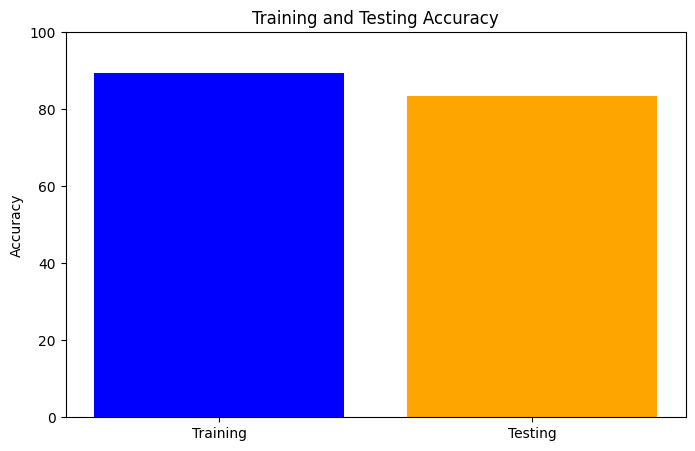


Sample 1: Probabilities - Class 0: 0.9178, Class 1: 0.0822, Prediction: 0
Sample 2: Probabilities - Class 0: 0.1164, Class 1: 0.8836, Prediction: 1
Sample 3: Probabilities - Class 0: 0.9055, Class 1: 0.0945, Prediction: 0
Sample 4: Probabilities - Class 0: 0.5846, Class 1: 0.4154, Prediction: 0
Sample 5: Probabilities - Class 0: 0.9494, Class 1: 0.0506, Prediction: 0
Sample 6: Probabilities - Class 0: 0.9165, Class 1: 0.0835, Prediction: 0
Sample 7: Probabilities - Class 0: 0.0528, Class 1: 0.9472, Prediction: 1
Sample 8: Probabilities - Class 0: 0.6307, Class 1: 0.3693, Prediction: 0
Sample 9: Probabilities - Class 0: 0.6015, Class 1: 0.3985, Prediction: 0
Sample 10: Probabilities - Class 0: 0.2947, Class 1: 0.7053, Prediction: 1
Sample 11: Probabilities - Class 0: 0.2089, Class 1: 0.7911, Prediction: 1
Sample 12: Probabilities - Class 0: 0.7250, Class 1: 0.2750, Prediction: 0
Sample 13: Probabilities - Class 0: 0.7901, Class 1: 0.2099, Prediction: 0
Sample 14: Probabilities - Class 

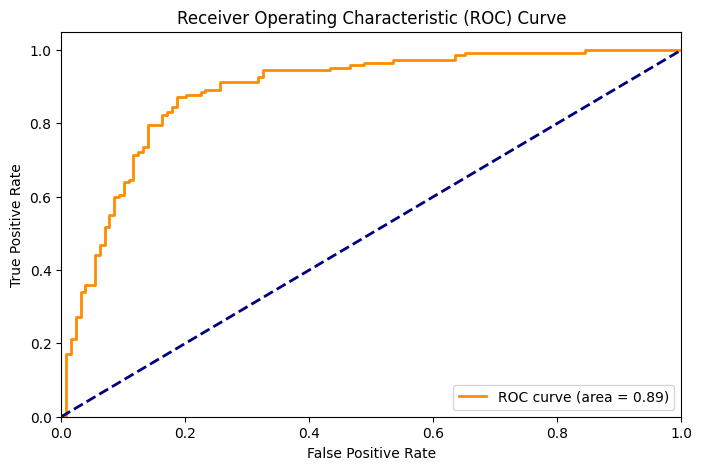

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the XGB model
xgb_model = XGBClassifier(random_state=0)

# Step 4-7: Hyperparameter tuning
xgb_model.set_params(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1
)

# Step 8: Train and test the XGB model
xgb_model.fit(X_train_scaled, y_train)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nXGBoost Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Display precision, recall, and F1 score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:\n")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = xgb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Training Features Shape: (642, 11)
Testing Features Shape: (276, 11)
Training Labels Shape: (642,)
Testing Labels Shape: (276,)
------------------------------------------------

XGBoost Model Metrics:
Training Accuracy: 92.83%
Training Error: 7.17%
Test Accuracy: 81.88%
Testing Error: 18.12%


True Positives (TP): 127
True Negatives (TN): 99
False Positives (FP): 30
False Negatives (FN): 20

Precision: 0.8089171974522293
Recall: 0.8639455782312925
F1-Score: 0.8355263157894737

Confusion Matrix:

            cardiac  no cardiac
cardiac         127          20
no cardiac       30          99


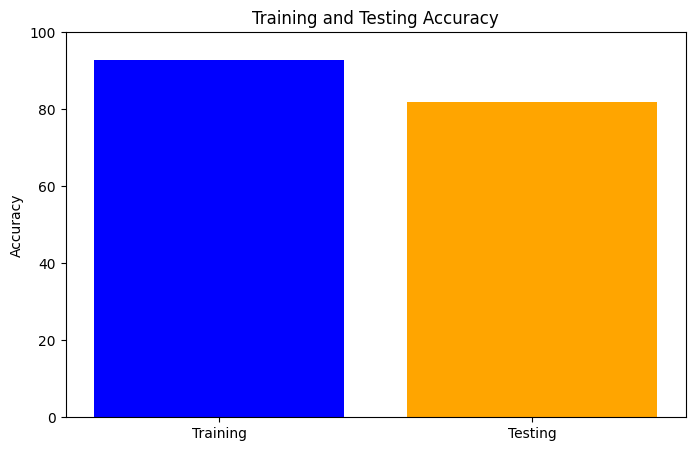


Sample 1: Probabilities - Class 0: 0.8662, Class 1: 0.1338, Prediction: 0
Sample 2: Probabilities - Class 0: 0.1611, Class 1: 0.8389, Prediction: 1
Sample 3: Probabilities - Class 0: 0.9143, Class 1: 0.0857, Prediction: 0
Sample 4: Probabilities - Class 0: 0.4537, Class 1: 0.5463, Prediction: 1
Sample 5: Probabilities - Class 0: 0.9519, Class 1: 0.0481, Prediction: 0
Sample 6: Probabilities - Class 0: 0.9380, Class 1: 0.0620, Prediction: 0
Sample 7: Probabilities - Class 0: 0.0259, Class 1: 0.9741, Prediction: 1
Sample 8: Probabilities - Class 0: 0.8414, Class 1: 0.1586, Prediction: 0
Sample 9: Probabilities - Class 0: 0.6372, Class 1: 0.3628, Prediction: 0
Sample 10: Probabilities - Class 0: 0.1391, Class 1: 0.8609, Prediction: 1
Sample 11: Probabilities - Class 0: 0.3035, Class 1: 0.6965, Prediction: 1
Sample 12: Probabilities - Class 0: 0.9240, Class 1: 0.0760, Prediction: 0
Sample 13: Probabilities - Class 0: 0.7473, Class 1: 0.2527, Prediction: 0
Sample 14: Probabilities - Class 

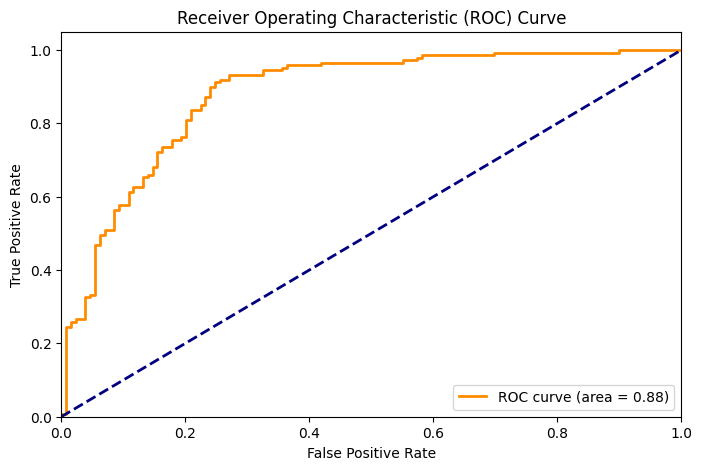

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the XGB model
xgb_model = XGBClassifier(random_state=0)

# Step 4-7: Hyperparameter tuning
xgb_model.set_params(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=7,
    min_child_weight=5
)

# Step 8: Train and test the XGB model
xgb_model.fit(X_train_scaled, y_train)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nXGBoost Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Display precision, recall, and F1 score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:\n")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = xgb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Training Features Shape: (642, 11)
Testing Features Shape: (276, 11)
Training Labels Shape: (642,)
Testing Labels Shape: (276,)
------------------------------------------------

XGBoost Model Metrics:
Training Accuracy: 93.46%
Training Error: 6.54%
Test Accuracy: 82.97%
Testing Error: 17.03%


True Positives (TP): 128
True Negatives (TN): 101
False Positives (FP): 28
False Negatives (FN): 19

Precision: 0.8205128205128205
Recall: 0.8707482993197279
F1-Score: 0.8448844884488449

Confusion Matrix:
            cardiac  no cardiac
cardiac         128          19
no cardiac       28         101


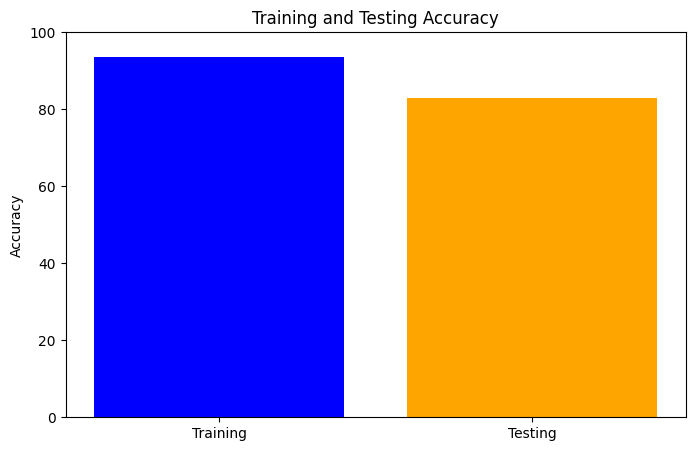


Sample 1: Probabilities - Class 0: 0.8866, Class 1: 0.1134, Prediction: 0
Sample 2: Probabilities - Class 0: 0.1796, Class 1: 0.8204, Prediction: 1
Sample 3: Probabilities - Class 0: 0.8752, Class 1: 0.1248, Prediction: 0
Sample 4: Probabilities - Class 0: 0.5010, Class 1: 0.4990, Prediction: 0
Sample 5: Probabilities - Class 0: 0.9422, Class 1: 0.0578, Prediction: 0
Sample 6: Probabilities - Class 0: 0.9621, Class 1: 0.0379, Prediction: 0
Sample 7: Probabilities - Class 0: 0.0186, Class 1: 0.9814, Prediction: 1
Sample 8: Probabilities - Class 0: 0.8152, Class 1: 0.1848, Prediction: 0
Sample 9: Probabilities - Class 0: 0.4310, Class 1: 0.5690, Prediction: 1
Sample 10: Probabilities - Class 0: 0.1004, Class 1: 0.8996, Prediction: 1
Sample 11: Probabilities - Class 0: 0.3085, Class 1: 0.6915, Prediction: 1
Sample 12: Probabilities - Class 0: 0.8978, Class 1: 0.1022, Prediction: 0
Sample 13: Probabilities - Class 0: 0.6834, Class 1: 0.3166, Prediction: 0
Sample 14: Probabilities - Class 

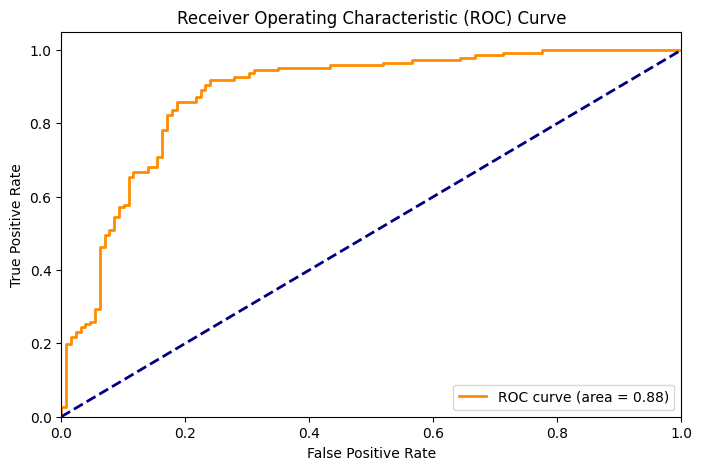

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the XGB model
xgb_model = XGBClassifier(random_state=0)

# Step 4-7: Hyperparameter tuning
xgb_model.set_params(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=4,
    min_child_weight=5
)

# Step 8: Train and test the XGB model
xgb_model.fit(X_train_scaled, y_train)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nXGBoost Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Display precision, recall, and F1 score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = xgb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
'''from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create the XGBoost classifier
xgb_model = XGBClassifier()

# Define the hyperparameter
param_grid_xgb = {
    'n_estimators': [250, 300, 350],
    'learning_rate': [0.3, 0.35, 0.4],
    'max_depth': [ 10, 11, 12],
    'min_child_weight': [8, 9, 10],


    'n_estimators': [250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440],
    'learning_rate': [0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63],
    'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
    'min_child_weight': [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5],

}
# Create GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_xgb)'''
'''
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create the XGBoost classifier
xgb_model = XGBClassifier()

# Define the hyperparameter grid
param_grid_xgb = {
    'n_estimators': [250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440],
    'learning_rate': [0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63],
    'max_depth': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
    'min_child_weight': [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5],
}

# Create GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Train the model with the best parameters
best_xgb_model = XGBClassifier(**best_params_xgb)
best_xgb_model.fit(X_train_scaled, y_train)

# Predict on training and testing data
y_train_pred = best_xgb_model.predict(X_train_scaled)
y_test_pred = best_xgb_model.predict(X_test_scaled)

# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_xgb)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

'''

'\nfrom xgboost import XGBClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score\n\n# Create the XGBoost classifier\nxgb_model = XGBClassifier()\n\n# Define the hyperparameter grid\nparam_grid_xgb = {\n    \'n_estimators\': [250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440],\n    \'learning_rate\': [0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55, 0.57, 0.59, 0.61, 0.63],\n    \'max_depth\': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],\n    \'min_child_weight\': [6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5],\n}\n\n# Create GridSearchCV\ngrid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring=\'accuracy\')\n\n# Fit the grid search to the data\ngrid_search_xgb.fit(X_train_scaled, y_train)\n\n# Get the best hyperparameters\nbes

In [ ]:
'''from xgboost import XGBClassifier
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the objective function for Optuna
def objective(trial):
    # Define the search space for hyperparameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 10000),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.10, 30.0),
        'max_depth': trial.suggest_int('max_depth', 2, 1000),
        'min_child_weight': trial.suggest_float('min_child_weight', 2, 1000),
    }

    # Create XGBoost classifier with hyperparameters
    model = XGBClassifier(**params)

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Create the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20000)  # You can adjust the number of trials

# Get the best hyperparameters
best_params_xgb = study.best_params
best_accuracy = study.best_value

# Train the model with the best parameters
best_xgb_model = XGBClassifier(**best_params_xgb)
best_xgb_model.fit(X_train_scaled, y_train)

# Predict on training and testing data
y_train_pred = best_xgb_model.predict(X_train_scaled)
y_test_pred = best_xgb_model.predict(X_test_scaled)

# Calculate training and testing accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params_xgb)
print("Best Accuracy:", best_accuracy)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

'n_estimators': 28, 'learning_rate': 0.5124832741853609, 'max_depth': 66, 'min_child_weight': 11.333039675714673}
n_estimators': 10, 'learning_rate': 0.4911710437402801, 'max_depth': 29, 'min_child_weight': 4.66089451256505
'''


'from xgboost import XGBClassifier\nimport optuna\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\n\n# Split the dataset into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)\n\n# Feature scaling\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n# Define the objective function for Optuna\ndef objective(trial):\n    # Define the search space for hyperparameters\n    params = {\n        \'n_estimators\': trial.suggest_int(\'n_estimators\', 10, 10000),\n        \'learning_rate\': trial.suggest_uniform(\'learning_rate\', 0.10, 30.0),\n        \'max_depth\': trial.suggest_int(\'max_depth\', 2, 1000),\n        \'min_child_weight\': trial.suggest_float(\'min_child_weight\', 2, 1000),\n    }\n\n    # Create XGBoost classifier with hyperparameters\n    model = X

Training Features Shape: (642, 11)
Testing Features Shape: (276, 11)
Training Labels Shape: (642,)
Testing Labels Shape: (276,)
------------------------------------------------

XGBoost Model Metrics:
Training Accuracy: 85.20%
Training Error: 14.80%
Test Accuracy: 83.70%
Testing Error: 16.30%


True Positives (TP): 127
True Negatives (TN): 104
False Positives (FP): 25
False Negatives (FN): 20

Precision: 0.8355263157894737
Recall: 0.8639455782312925
F1-Score: 0.8494983277591973

Confusion Matrix:
            cardiac  no cardiac
cardiac         127          20
no cardiac       25         104


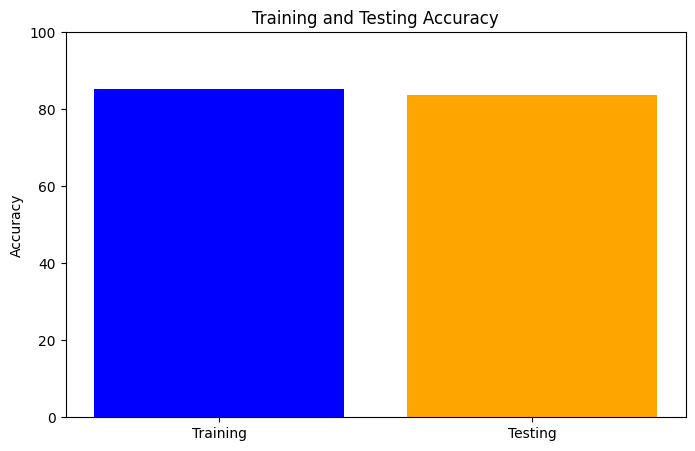


Sample 1: Probabilities - Class 0: 0.9465, Class 1: 0.0535, Prediction: 0
Sample 2: Probabilities - Class 0: 0.0782, Class 1: 0.9218, Prediction: 1
Sample 3: Probabilities - Class 0: 0.8295, Class 1: 0.1705, Prediction: 0
Sample 4: Probabilities - Class 0: 0.5633, Class 1: 0.4367, Prediction: 0
Sample 5: Probabilities - Class 0: 0.9051, Class 1: 0.0949, Prediction: 0
Sample 6: Probabilities - Class 0: 0.9332, Class 1: 0.0668, Prediction: 0
Sample 7: Probabilities - Class 0: 0.0528, Class 1: 0.9472, Prediction: 1
Sample 8: Probabilities - Class 0: 0.7965, Class 1: 0.2035, Prediction: 0
Sample 9: Probabilities - Class 0: 0.5603, Class 1: 0.4397, Prediction: 0
Sample 10: Probabilities - Class 0: 0.1335, Class 1: 0.8665, Prediction: 1
Sample 11: Probabilities - Class 0: 0.2299, Class 1: 0.7701, Prediction: 1
Sample 12: Probabilities - Class 0: 0.6352, Class 1: 0.3648, Prediction: 0
Sample 13: Probabilities - Class 0: 0.8253, Class 1: 0.1747, Prediction: 0
Sample 14: Probabilities - Class 

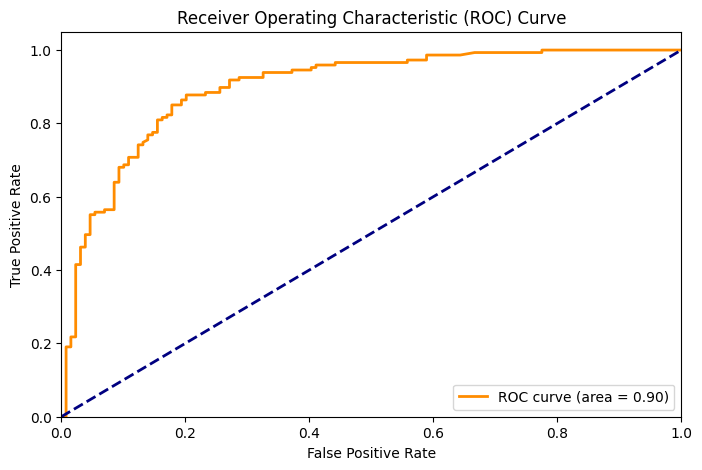

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the XGB model
xgb_model = XGBClassifier(random_state=0)

# Step 4-7: Hyperparameter tuning
xgb_model.set_params(
    n_estimators=41,
    learning_rate=0.15,
    max_depth=3,
    min_child_weight=13
)

'''
n_estimators=40,
    learning_rate=0.15,
    max_depth=3,
    min_child_weight=13


 n_estimators=140,
    learning_rate=0.15,
    max_depth=2,
    min_child_weight=15

n_estimators=140,
    learning_rate=0.15,
    max_depth=2,
    min_child_weight=9
'''
# Step 8: Train and test the XGB model
xgb_model.fit(X_train_scaled, y_train)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nXGBoost Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Display precision, recall, and F1 score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = xgb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Training Features Shape: (642, 11)
Testing Features Shape: (276, 11)
Training Labels Shape: (642,)
Testing Labels Shape: (276,)
------------------------------------------------

XGBoost Model Metrics:
Training Accuracy: 89.88%
Training Error: 10.12%
Test Accuracy: 83.70%
Testing Error: 16.30%


True Positives (TP): 130
True Negatives (TN): 101
False Positives (FP): 28
False Negatives (FN): 17

Precision: 0.8227848101265823
Recall: 0.8843537414965986
F1-Score: 0.8524590163934427

Confusion Matrix:
            cardiac  no cardiac
cardiac         130          17
no cardiac       28         101


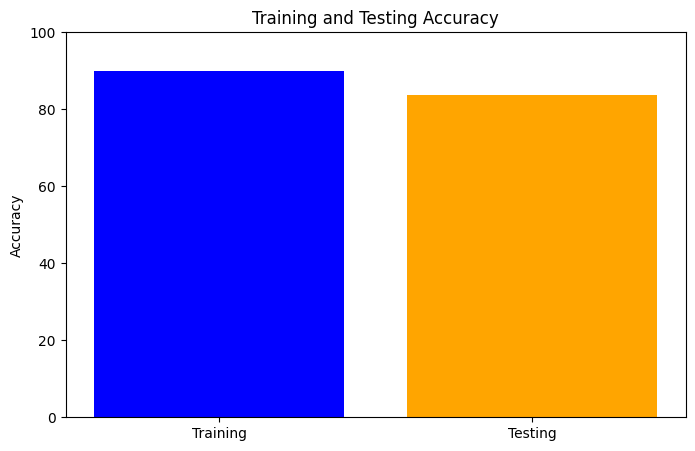


Sample 1: Probabilities - Class 0: 0.9041, Class 1: 0.0959, Prediction: 0
Sample 2: Probabilities - Class 0: 0.1815, Class 1: 0.8185, Prediction: 1
Sample 3: Probabilities - Class 0: 0.8084, Class 1: 0.1916, Prediction: 0
Sample 4: Probabilities - Class 0: 0.4520, Class 1: 0.5480, Prediction: 1
Sample 5: Probabilities - Class 0: 0.9408, Class 1: 0.0592, Prediction: 0
Sample 6: Probabilities - Class 0: 0.9266, Class 1: 0.0734, Prediction: 0
Sample 7: Probabilities - Class 0: 0.1217, Class 1: 0.8783, Prediction: 1
Sample 8: Probabilities - Class 0: 0.7552, Class 1: 0.2448, Prediction: 0
Sample 9: Probabilities - Class 0: 0.5827, Class 1: 0.4173, Prediction: 0
Sample 10: Probabilities - Class 0: 0.1105, Class 1: 0.8895, Prediction: 1
Sample 11: Probabilities - Class 0: 0.1967, Class 1: 0.8033, Prediction: 1
Sample 12: Probabilities - Class 0: 0.8583, Class 1: 0.1417, Prediction: 0
Sample 13: Probabilities - Class 0: 0.8511, Class 1: 0.1489, Prediction: 0
Sample 14: Probabilities - Class 

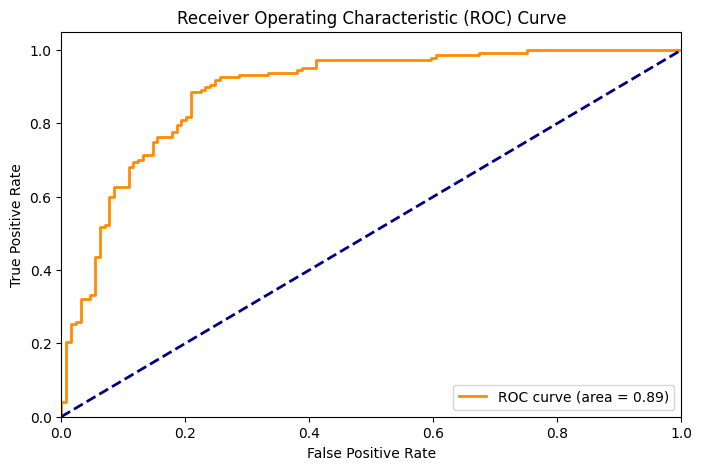

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Split the dataset into training and testing sets
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create the XGB model
xgb_model = XGBClassifier(random_state=0)

# Step 4-7: Hyperparameter tuning
xgb_model.set_params(
    n_estimators=10,
    learning_rate=0.4911710437402801,
    max_depth=29,
    min_child_weight=4.66089451256505


)

'''
n_estimators=40,
    learning_rate=0.15,
    max_depth=3,
    min_child_weight=13


 n_estimators=140,
    learning_rate=0.15,
    max_depth=2,
    min_child_weight=15

n_estimators=140,
    learning_rate=0.15,
    max_depth=2,
    min_child_weight=9
'''
# Step 8: Train and test the XGB model
xgb_model.fit(X_train_scaled, y_train)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)


# Evaluate the model
accuracy_train = accuracy_score(y_train, y_train_pred) * 100
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
error_train = 100 - accuracy_train
error_test = 100 - accuracy_test
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print("------------------------------------------------")
print("\nXGBoost Model Metrics:")
print("Training Accuracy: {:.2f}%".format(accuracy_train))
print("Training Error: {:.2f}%".format(error_train))
print("Test Accuracy: {:.2f}%".format(accuracy_test))
print("Testing Error: {:.2f}%\n".format(error_test))

# Define class labels
class_labels = ["no cardiac", "cardiac"]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Extract TP, TN, FP, FN counts
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Calculate precision, recall, and F1 score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the counts
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

# Display precision, recall, and F1 score
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Display the confusion matrix
cm_df = pd.DataFrame(conf_matrix[::-1, ::-1], index=class_labels[::-1], columns=class_labels[::-1])
print("\nConfusion Matrix:")
print(cm_df)

# Plotting the accuracy
plt.figure(figsize=(8, 5))
plt.bar([1, 2], [accuracy_train, accuracy_test], color=['blue', 'orange'])
plt.title('Training and Testing Accuracy')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Assuming accuracy is between 0 and 100
plt.show()

# Predict probabilities on the test set
probabilities = xgb_model.predict_proba(X_test_scaled)

# Set the threshold
threshold = 0.5

# Apply the threshold to convert probabilities to binary predictions
binary_predictions = (probabilities[:, 1] >= threshold).astype(int)
print()

# Display the probabilities and binary predictions for all samples
for i in range(len(probabilities)):
    print(f"Sample {i + 1}: Probabilities - Class 0: {probabilities[i, 0]:.4f}, Class 1: {probabilities[i, 1]:.4f}, Prediction: {binary_predictions[i]}")

print()
# Calculate TP, TN, FP, FN based on binary predictions for all samples
binary_conf_matrix_all = confusion_matrix(y_test, binary_predictions)

# Extract TP, TN, FP, FN counts
TN_binary_all = binary_conf_matrix_all[0, 0]
FP_binary_all = binary_conf_matrix_all[0, 1]
FN_binary_all = binary_conf_matrix_all[1, 0]
TP_binary_all = binary_conf_matrix_all[1, 1]

# Display TP, TN, FP, FN for all samples
print("\nBinary Confusion Matrix for All Samples:")
print(f"True Positives (TP): {TP_binary_all}")
print(f"True Negatives (TN): {TN_binary_all}")
print(f"False Positives (FP): {FP_binary_all}")
print(f"False Negatives (FN): {FN_binary_all}")

# Calculate precision, recall, and F1 score for all samples
precision_binary_all = TP_binary_all / (TP_binary_all + FP_binary_all)
recall_binary_all = TP_binary_all / (TP_binary_all + FN_binary_all)
f1_score_binary_all = 2 * (precision_binary_all * recall_binary_all) / (precision_binary_all + recall_binary_all)

# Display precision, recall, and F1 score for all samples
print("\nPerformance Metrics for All Samples:")
print(f"Precision: {precision_binary_all:.4f}")
print(f"Recall: {recall_binary_all:.4f}")
print(f"F1 Score: {f1_score_binary_all:.4f}")

#Calculate AUC and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
print("")
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()